In [7]:
# 🩺 Heart Disease Prediction Project - Step 1

## Problem Statement
# Goal: Predict whether a person is likely to have heart disease based on medical attributes.
# Type: Supervised Learning (Binary Classification)
# Target: 'target' column (1 = disease, 0 = no disease)
# Importance: Early prediction helps doctors take preventive steps.

## Overview of Dataset
# Dataset: Heart Disease UCI Dataset (Cleveland Clinic)
# Total Rows: 303
# Total Columns: 14 (13 features + 1 target)

# Column Descriptions
# age      : Age of the patient
# sex      : Gender (1 = male, 0 = female)
# cp       : Chest Pain Type (0–3)
# trestbps : Resting Blood Pressure (in mm Hg)
# chol     : Serum Cholesterol (in mg/dl)
# fbs      : Fasting Blood Sugar > 120 mg/dl (1 = true, 0 = false)
# restecg  : Resting ECG Results (0–2)
# thalach  : Maximum Heart Rate Achieved
# exang    : Exercise Induced Angina (1 = yes, 0 = no)
# oldpeak  : ST Depression Induced by Exercise
# slope    : Slope of Peak Exercise ST Segment (0–2)
# ca       : Number of Major Vessels (0–4)
# thal     : Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
# target   : 1 = heart disease present, 0 = no disease

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data =pd.read_csv('/content/sample_data/heart - heart.csv')
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [10]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
# renaming the columns
data.rename(columns={
    'age':'Age',
    'sex':'Gender',
    'cp':'ChestPainType',
    'trestbps':'RestingBp',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'ST_Depression',
    'slope': 'ST_Slope',
    'ca': 'MajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)
print("update dataset:",data.head())
data.columns


update dataset:    Age  Gender  ChestPainType  RestingBp  Cholesterol  FastingBS  RestingECG  \
0   63       1              3        145          233          1           0   
1   37       1              2        130          250          0           1   
2   41       0              1        130          204          0           0   
3   56       1              1        120          236          0           1   
4   57       0              0        120          354          0           1   

   MaxHR  ExerciseAngina  ST_Depression  ST_Slope  MajorVessels  Thalassemia  \
0    150               0            2.3         0             0            1   
1    187               0            3.5         0             0            2   
2    172               0            1.4         2             0            2   
3    178               0            0.8         2             0            2   
4    163               1            0.6         2             0            2   

   HeartDisease  
0   

Index(['Age', 'Gender', 'ChestPainType', 'RestingBp', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'ST_Depression',
       'ST_Slope', 'MajorVessels', 'Thalassemia', 'HeartDisease'],
      dtype='object')

In [15]:
#data cleaning
data.isnull()

,Age,Gender,ChestPainType,RestingBp,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

,0
Age,0
Gender,0
ChestPainType,0
RestingBp,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
ST_Depression,0


In [17]:
# removing duplicate data / finding duplicate data
duplicates =data.duplicated().sum()
print("Total duplicate rows:",duplicates)

Total duplicate rows: 1


In [18]:
# display duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Age,Gender,ChestPainType,RestingBp,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [19]:
# keep=False returns all rows that are duplicated (both copies)
duplicate_all = data[data.duplicated(keep=False)]
duplicate_all

,Age,Gender,ChestPainType,RestingBp,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [20]:
data =data.drop_duplicates()
print("shape of our dataset after removing duplicate rows")
print(data.shape)

shape of our dataset after removing duplicate rows
(302, 14)


In [21]:
print("Before:",len(data)+1)
data = data.drop_duplicates()
print("after:",len(data))

Before: 303
after: 302


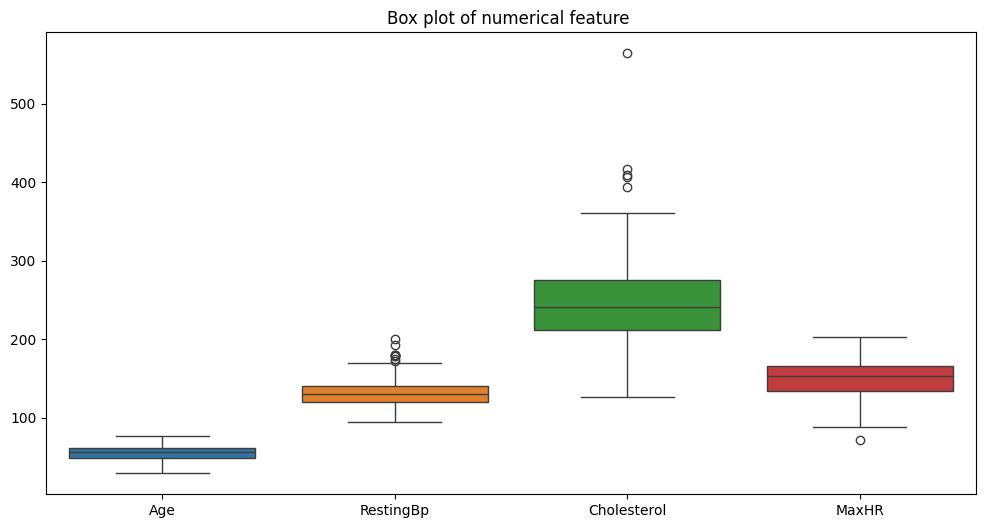

In [22]:
import seaborn as sns

# detect outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['Age','RestingBp','Cholesterol','MaxHR']])
plt.title("Box plot of numerical feature ")
plt.show()

In [23]:
# handling outlier
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] > upper, upper,
                            np.where(data[column] < lower, lower, data[column]))

# apply to columns
cap_outliers(data, 'RestingBp')
cap_outliers(data, 'Cholesterol')
cap_outliers(data, 'MaxHR')

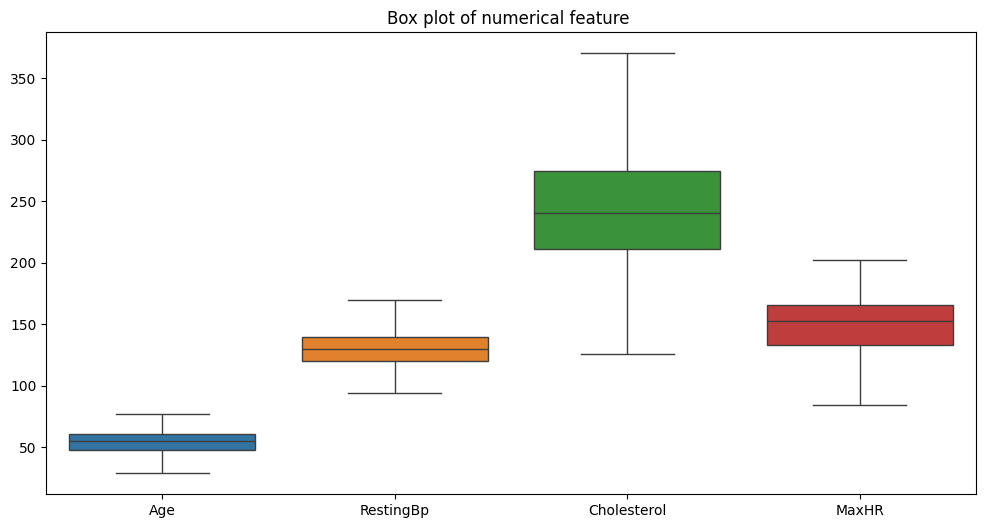

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['Age','RestingBp','Cholesterol','MaxHR']])
plt.title("Box plot of numerical feature ")
plt.show()

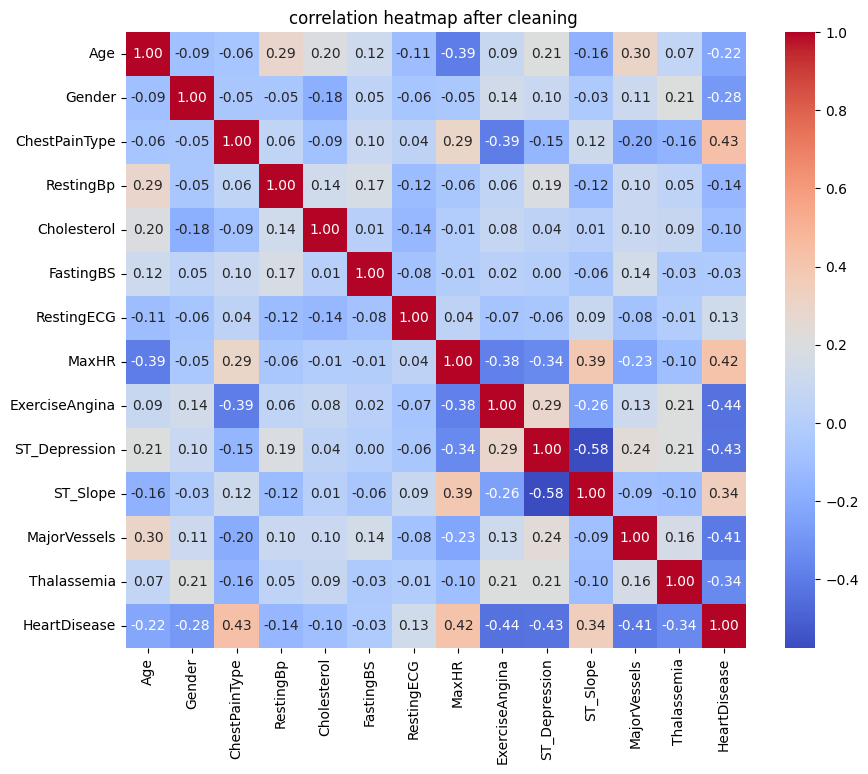

In [25]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap after cleaning ')
plt.show()

In [26]:
print("Final dataset shape:",data.shape)
print("Any missing values:")
print(data.isnull().sum())
data.head()

Final dataset shape: (302, 14)
Any missing values:
Age               0
Gender            0
ChestPainType     0
RestingBp         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Depression     0
ST_Slope          0
MajorVessels      0
Thalassemia       0
HeartDisease      0
dtype: int64


,Age,Gender,ChestPainType,RestingBp,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [27]:
# data preprocessing
# separating the feature and target variable
# encoding categorical data
#scaling numerical values
# spliting data into training and testing


In [28]:
# separating the feature and target variable
x = data.drop('HeartDisease',axis=1)
y =data['HeartDisease']
print("feature matrix shape",x.shape)

feature matrix shape (302, 13)


In [29]:
# encoding categorical data
categorical_cols =['Gender','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','MajorVessels','Thalassemia']
numerical_cols =['Age','Cholesterol','RestingBp', 'MaxHR', 'ST_Depression']

print("Categorical columns:",categorical_cols)
print("Numerical columns:",numerical_cols)

Categorical columns: ['Gender', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'MajorVessels', 'Thalassemia']
Numerical columns: ['Age', 'Cholesterol', 'RestingBp', 'MaxHR', 'ST_Depression']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# encoding categorical data
X_encode = pd.get_dummies(data,columns=categorical_cols,drop_first=True)
#Drops the first dummy column per categorical variable to prevent the dummy variable trap
print("Shape after encoding:",X_encode.shape)
X_encode.head()

Shape after encoding: (302, 23)


,Age,RestingBp,Cholesterol,MaxHR,ST_Depression,HeartDisease,Gender_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,...,ExerciseAngina_1,ST_Slope_1,ST_Slope_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,MajorVessels_4,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,63,145.0,233.0,150.0,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130.0,250.0,187.0,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130.0,204.0,172.0,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120.0,236.0,178.0,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120.0,354.0,163.0,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [31]:
# feature scaling
scaler = StandardScaler()
X_encode[numerical_cols] = scaler.fit_transform(X_encode[numerical_cols])
print("scaled numerical feature :")
print(X_encode[numerical_cols].head())

scaled numerical feature :
        Age  Cholesterol  RestingBp     MaxHR  ST_Depression
0  0.949794    -0.261076   0.828927  0.017027       1.084022
1 -1.928548     0.097514  -0.075902  1.644957       2.118926
2 -1.485726    -0.872787  -0.075902  0.984985       0.307844
3  0.174856    -0.197795  -0.679121  1.248974      -0.209608
4  0.285561     2.291236  -0.679121  0.589003      -0.382092


In [32]:
# spliting data into training and testing
x_train,x_test,y_train,y_test = train_test_split(
    X_encode,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y

)
print("training data shape:",x_train.shape)
print("testing data shape:",x_test.shape)


training data shape: (241, 23)
testing data shape: (61, 23)


In [33]:
# Model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred_lr =log_reg.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test,y_pred_lr)

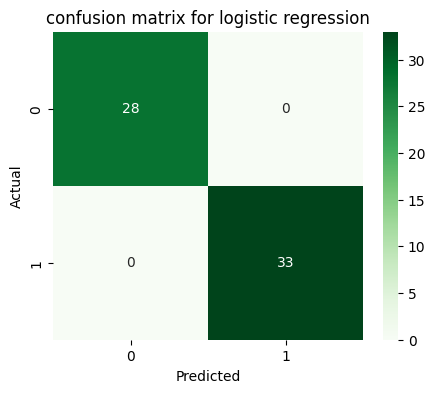

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr,annot=True ,fmt ='d', cmap="Greens")
plt.title("confusion matrix for logistic regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Random Forest Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



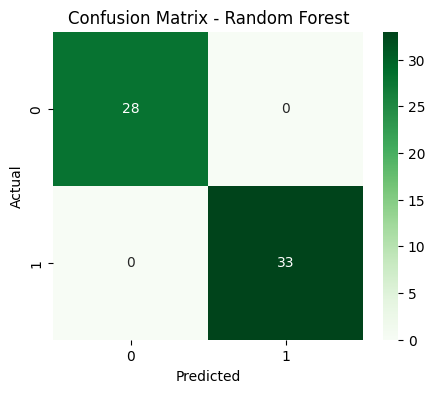

In [35]:
#RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n Random Forest Accuracy:", round(accuracy_rf * 100, 1), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens') # fmt ='d means integer formatting(no decimal)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Comparison
                    Model  Accuracy
0      LogisticRegression       1.0
1  RandomForestClassifier       1.0


/tmp/ipython-input-3006598064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',y='Accuracy',data=results,palette='coolwarm')


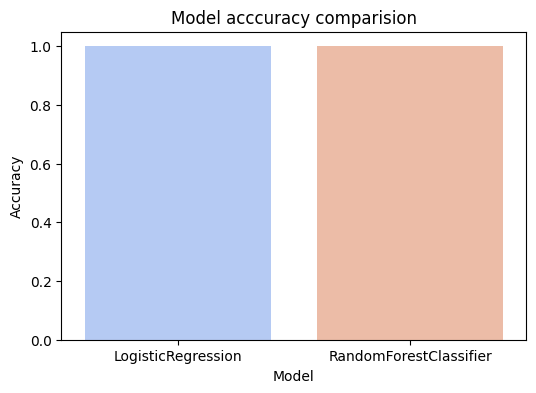

In [36]:

# comparing model
results = pd.DataFrame({
    'Model': ["LogisticRegression", "RandomForestClassifier"],
    'Accuracy': [accuracy_lr, accuracy_rf]
})
print("Model Comparison")
print(results)

plt.figure(figsize=(6,4))
sns.barplot(x='Model',y='Accuracy',data=results,palette='coolwarm')
plt.title("Model acccuracy comparision")
plt.show()

In [37]:
# saving model
import pickle
with open('heart-disease-model.pkl','wb') as file:
    pickle.dump((rf_model,scaler),file)
    # serializes and saves both the trained Random Forest model (rf_model) and scaler object (scaler) as a single pickle file using
    # Python's tuple packing for efficient model deployment.

print("model save successfully")

model save successfully


In [38]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.5 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [39]:
%%writefile app.py

Writing app.py


In [40]:
%%writefile requirements.txt

Writing requirements.txt


In [41]:
! wget -q -O - ipv4.icanhazip.com

34.150.130.66


In [42]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.130.66:8501



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://twelve-heads-wonder.loca.lt
  Stopping...
^C
